Carica il dataset "Iris" utilizzando sklearn.datasets.load_iris().
Considera tutte le quattro caratteristiche (lunghezza e larghezza di sepali e petali) per il clustering.
Applica l'algoritmo K-Means con un numero di cluster pari a 3.
Visualizza i cluster ottenuti utilizzando tecniche di visualizzazione adeguate (ad esempio, plot 2D delle prime due componenti principali).
Confronta i cluster assegnati dall'algoritmo con le etichette reali delle specie di iris.
Calcola metriche di valutazione come l'Indice di Rand Adjusted o l'Homogeneity Score per quantificare la qualità del clustering.
Discuti i risultati e l'eventuale corrispondenza tra i cluster e le specie reali.

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## from sklearn.datasets import load_iris
data = load_iris()
X = data.data  # caratteristiche
y = data.target  # target

In [36]:
## inizializzo lo scaler con costruttore vuoto, normalizzo i dati
## codice strappato da https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
## from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [39]:

## Considera tutte le quattro caratteristiche (lunghezza e larghezza di sepali e petali) per il clustering.
## Applica l'algoritmo K-Means con un numero di cluster pari a 3.

# Creazione del modello K-Means
kmeans = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    n_init = 10,
    max_iter = 300,
    tol = 1e-4,
    random_state = 42
)



In [46]:
# Addestramento del modello
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [41]:
# Predizione dei cluster
y_kmeans = kmeans.predict(X)

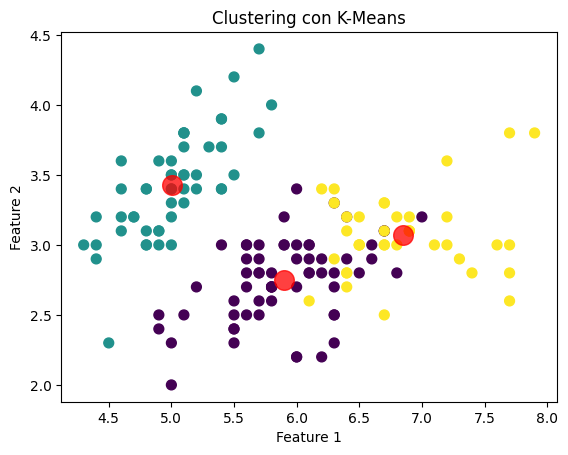

In [42]:
## Visualizza i cluster ottenuti utilizzando tecniche di visualizzazione adeguate (ad esempio, plot 2D delle prime due componenti principali).

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centri = kmeans.cluster_centers_
plt.scatter(centri[:, 0], centri[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clustering con K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [43]:
# Predizione dei cluster
y_kmeans = kmeans.predict(X)

In [44]:
## Calcola metriche di valutazione come l'Indice di Rand Adjusted o l'Homogeneity Score per quantificare la qualità del clustering.
from sklearn.metrics.cluster import adjusted_rand_score
accuracy = adjusted_rand_score(y, y_kmeans)
print(f"Accuratezza del modello: {accuracy:.2f}")

from sklearn.metrics.cluster import homogeneity_score
score = homogeneity_score(y, y_kmeans)
print(f"Accuratezza del modello: {score:.2f}")


Accuratezza del modello: 0.73
Accuratezza del modello: 0.75


In [45]:
## Discuti i risultati e l'eventuale corrispondenza tra i cluster e le specie reali.

## FIGO
